In [1]:
from keras.models import Sequential # Load Liabraries
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
ff = pd.read_csv('/content/forestfires.csv') # Read Data


In [3]:
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [4]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Checking for null values & data types

In [6]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# **Since number of columns are more, let's use PCA**

In [7]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)

In [8]:
ff1= ff.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(ff1)
ff_norm = sc.transform(ff1)
ff_norm                     #Normalised dataset

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca_values = pca.fit_transform(ff_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -6.05082538e-15, -1.58743875e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -2.67236885e-15, -6.92610536e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  5.92028990e-15,  8.36530871e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -6.98934052e-16,  4.03200598e-18],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.57925976e-16, -3.39227990e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  6.17289277e-17, -8.31075187e-17]])

In [10]:
# The amount of variance that each PCA explains is 

In [11]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 3.42850975e-33])

In [12]:
# Cumulative variance 

In [13]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

In [14]:
# Variance plot for PCA components obtained

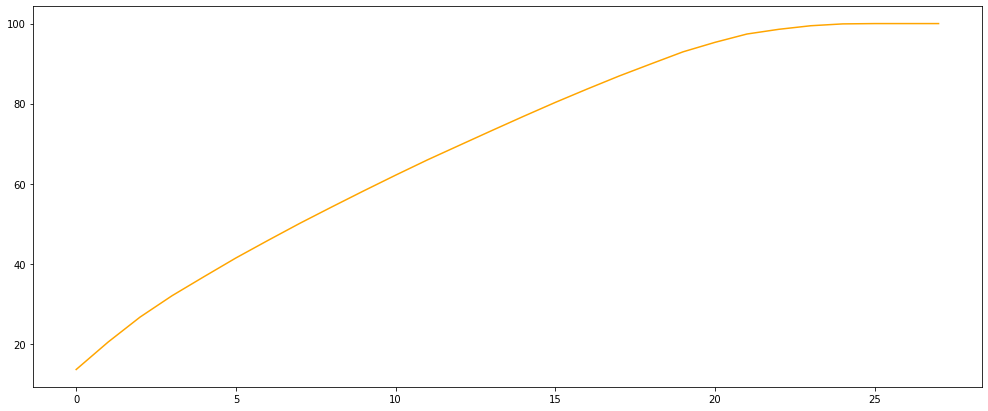

In [15]:
plt.figure(figsize=(17,7))
plt.plot(var1,color="orange");

**Selecting first 24 PCAs out of total 28**

In [16]:
finalff = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     ff[['size_category']]], axis = 1)
finalff.size_category.replace(('large','small'),(1,0),inplace=True)
finalff

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,-0.536738,1.234550,0.276198,-0.671216,-0.529599,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,-2.876498,-0.568255,2.095225,1.417634,-0.879983,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,-3.236229,-0.601439,1.998004,1.477351,-0.946682,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,-0.145846,1.019492,0.576990,-0.752744,0.349346,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,-0.467108,1.131879,-0.137990,-0.823316,0.402298,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,-0.933909,0.161275,-0.398215,0.197490,-0.801640,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,-0.652051,-0.132893,-0.518732,0.162358,-0.274733,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,-0.657663,-0.083060,-0.285899,0.062647,-0.494765,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,-0.503898,0.174276,-0.163149,0.246912,-0.147679,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [17]:
# split into input (X) and output (Y) variables

In [18]:
array = finalff.values
X = array[:,0:24]
Y = array[:,24]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [19]:
# create model

In [20]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
# Compile model

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the model

In [24]:
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 15s 16ms/step - loss: 0.8304 - accuracy: 0.3893 - val_loss: 0.7136 - val_accuracy: 0.5897
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.5831 - val_loss: 0.6637 - val_accuracy: 0.6346
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6971 - val_loss: 0.6428 - val_accuracy: 0.6795
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7265 - val_loss: 0.6328 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7898 - val_loss: 0.6277 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7471 - val_loss: 0.6260 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7626 - val_loss: 0.6251 - val_accuracy: 0.6795
Epoch 8/150

In [25]:
# evaluate the model

In [26]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9458
accuracy: 94.58%
